In [341]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [342]:
house=pd.read_csv('housing.csv')
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,House Price
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [343]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
House Price             0
dtype: int64

In [344]:
mean_value=house['total_bedrooms'].mean()
house['total_bedrooms'].fillna(value=mean_value,inplace=True)
house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
House Price           0
dtype: int64

<AxesSubplot:>

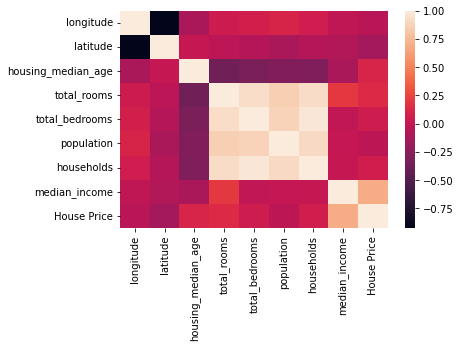

In [345]:
sns.heatmap(house.corr())

In [346]:
corr=house.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\tofee\AppData\Local\Temp\ipykernel_14584\2557058747.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(3)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,House Price
longitude,1.000,-0.925,-0.108,0.045,0.069,0.100,0.055,-0.015,-0.046
latitude,-0.925,1.000,0.011,-0.036,-0.067,-0.109,-0.071,-0.080,-0.144
housing_median_age,-0.108,0.011,1.000,-0.361,-0.319,-0.296,-0.303,-0.119,0.106
total_rooms,0.045,-0.036,-0.361,1.000,0.927,0.857,0.918,0.198,0.134
total_bedrooms,0.069,-0.067,-0.319,0.927,1.000,0.874,0.975,-0.008,0.049
population,0.100,-0.109,-0.296,0.857,0.874,1.000,0.907,0.005,-0.025
households,0.055,-0.071,-0.303,0.918,0.975,0.907,1.000,0.013,0.066
median_income,-0.015,-0.080,-0.119,0.198,-0.008,0.005,0.013,1.000,0.688
House Price,-0.046,-0.144,0.106,0.134,0.049,-0.025,0.066,0.688,1.000


In [347]:
#Making a seperate DataFrame for absolute correlation values.
corr_matrix = house.corr().abs()

#As on the diagonal we will be having values of perfect 1, so we have to ignore them and chose values above
# the diagonal or below. We will be using the upper triangular matrix.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#Columns to be dropped having corr > 0.5 or <-0.5 as stored in this list.
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop2=[column for column in upper.columns if any(upper[column] < -0.9)]

#Printing the columns to be dropped.
print(to_drop)
print(to_drop2)

#Dropping the columns.
house.drop(to_drop, axis=1, inplace=True)
house.drop(to_drop2,axis=1,inplace=True)

['latitude', 'total_bedrooms', 'households']
[]


In [348]:
house.head()

,longitude,housing_median_age,total_rooms,population,median_income,House Price
0,-122.23,41,880,322,8.3252,452600
1,-122.22,21,7099,2401,8.3014,358500
2,-122.24,52,1467,496,7.2574,352100
3,-122.25,52,1274,558,5.6431,341300
4,-122.25,52,1627,565,3.8462,342200


In [349]:
house=pd.concat([pd.Series(1,index=house.index,name='00'),house],axis=1)
house.head()

,00,longitude,housing_median_age,total_rooms,population,median_income,House Price
0,1,-122.23,41,880,322,8.3252,452600
1,1,-122.22,21,7099,2401,8.3014,358500
2,1,-122.24,52,1467,496,7.2574,352100
3,1,-122.25,52,1274,558,5.6431,341300
4,1,-122.25,52,1627,565,3.8462,342200


In [350]:
x=house.drop(columns='House Price')
y=house.iloc[:,6]
x.head()

,00,longitude,housing_median_age,total_rooms,population,median_income
0,1,-122.23,41,880,322,8.3252
1,1,-122.22,21,7099,2401,8.3014
2,1,-122.24,52,1467,496,7.2574
3,1,-122.25,52,1274,558,5.6431
4,1,-122.25,52,1627,565,3.8462


In [351]:
for i in range(1, len(x.columns)):
    x.iloc[:, i-1] = x.iloc[:, i-1]/np.max(x.iloc[:, i-1])
# x = (x - x.mean()) / x.std()
# x = np.c_[np.ones(x.shape[0]), x] 

In [352]:
theta=np.array([0]*(len(house.columns)-1))


In [353]:
m=len(house)


In [354]:
def hypothesis(theta,x):
    return theta*x


In [355]:
def computecost(x,y,theta):
    y1=hypothesis(theta,x)
    y1=np.sum(y1,axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*20640)

In [356]:
def gradientDescent(x,y,theta,alpha,iter):
    J = []  #cost function in each iterations
    k = 0
    while k < iter:        
        y1 = hypothesis(theta, x)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(x.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*x.iloc[:,c])/len(x))
        j = computecost(x, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [357]:
cost,j,theta=gradientDescent(x,y,theta,0.05,1000)

In [359]:
y_hat = hypothesis(theta,x)
y_hat = np.sum(y_hat, axis=1)

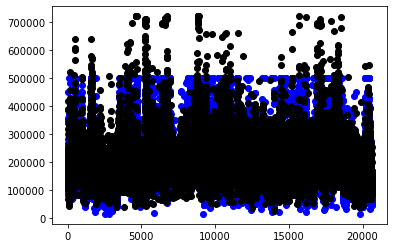

In [360]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, m)),y= y, color='blue')         
plt.scatter(x=list(range(0, m)), y=y_hat, color='black')
plt.show()

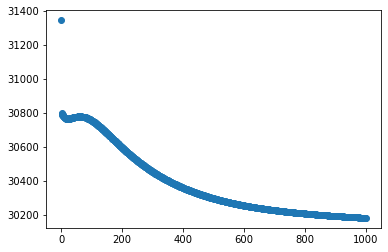

In [361]:
plt.figure()
plt.scatter(x=list(range(0, 1000)), y=cost)
plt.show()